<h1>CS 41344 - Natural Language Processing</h1>
<h2 style = 'color:yellow'>1.8 Language Models</h2>

<ul>
    <li>RNN</li>
    <li>Transformers</li>
    <li>NLP GPT</li>
    <li>BERT</li>
    <li>Future of Language Models</li>
</ul>

<h3 style = 'color:lightgreen'>1.8.0 Import Libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Image

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import tensorflow as tf
import keras as ks
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

import transformers

c:\Users\Owner\anaconda3\envs\tensorflow\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<h3 style = 'color:lightgreen'>1.8.1 RNNs</h3>

<h4 style = 'color:green'>1.8.1.1 Neural Network Architectures</h4>

There are several architectures that can be used in a neural network.

<ul>
    <li><b>One-to-one: </b>Also known as the vanilla neural networks, these NNs have an input denoted by the red box, a series of hidden layers, and an output.</li>
    <li><b>One-to-many: </b>Used for image captioning, where we take an impage as an output, and generate a series of words to describe it.</li>
    <li><b>Many-to-one: </b>Used for sentiment classification. In this architecture we feed in a lot of words, then the system predicts the sentiments.</li>
    <li><b>Many-to-many: </b>Used for Machine Translation, where we feed in a sequence of words and the machine provides another set of sequence of words (English - French)</li>
    <li><b>Many-to-many: </b>Used for video classification on frame level. The NN is used to describe each frame (image) of a video.</li>
</ul>

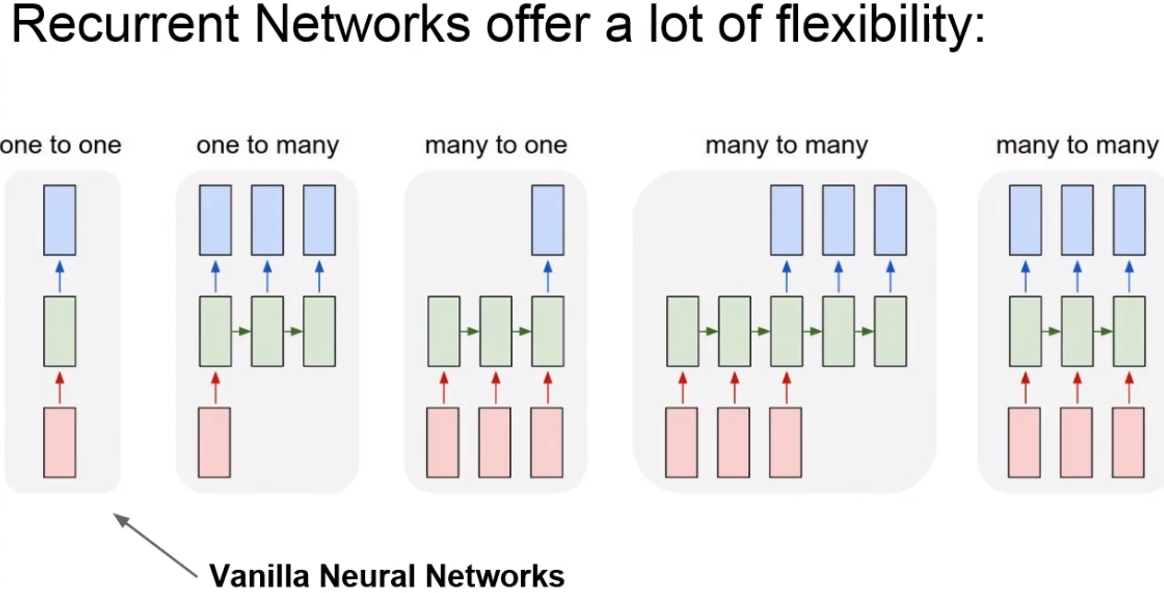

In [2]:
Image("../3. Images/Neural Network Architectures - 1.png", width=500, height=500)

In an RNN architecture, the input is both a feedback loop that provides information about the previous state and the input given to the nodes. RNNs were developed because of the limitations of the feed forward neural network architecture.

<ul>
    <li>No memory</li>
    <li>Not designed for a sequence of data</li>
</ul>

<h4 style = 'color:green'>1.8.1.2 Introduction to RNNs</h4>

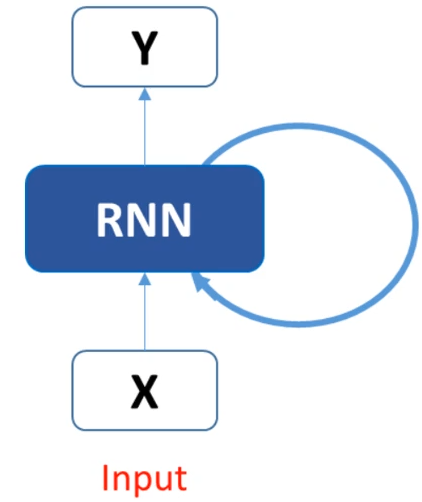

In [3]:
Image("../3. Images/RNNs - 1.png", width=200, height=200)

In the following example, we have an input matrix that shows the demand for Math, R, and Python language and the output denoting the recommended courses. 

<b>Input: Demand for - </b>
<ul>
    <li>Math   [1, 0, 0]</li>
    <li>R      [0, 1, 0]</li>
    <li>Python [0, 0, 1]</li>
</ul>

<b>Output: Recommended courses - </b>
<ul>
    <li>Math   [1, 0, 0]</li>
    <li>R      [0, 1, 0]</li>
    <li>Python [0, 0, 1]</li>
</ul>

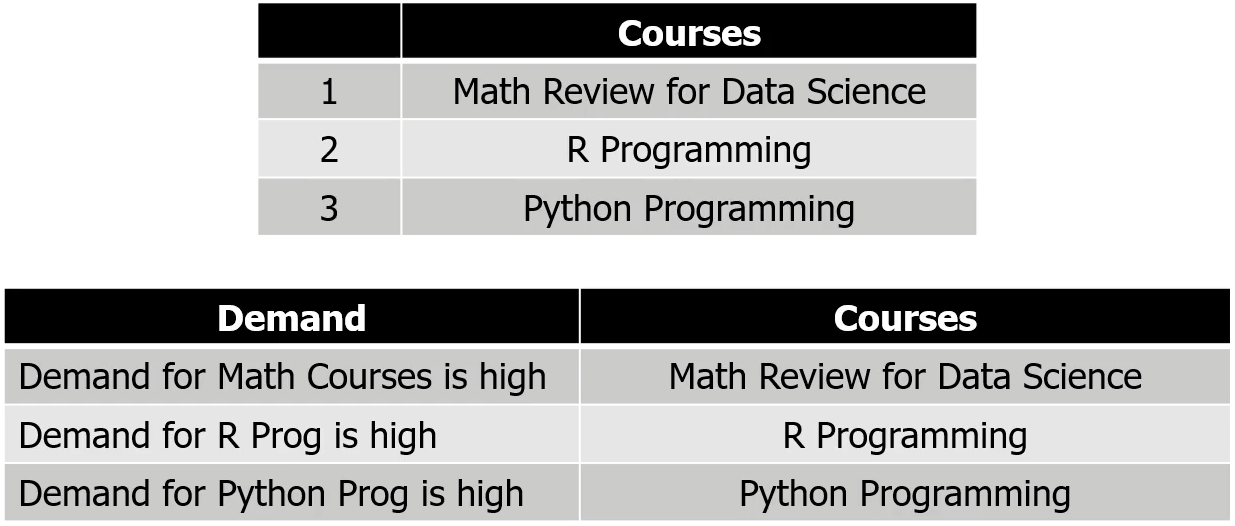

In [4]:
Image("../3. Images/RNNs - 2.png", width=500, height=500)

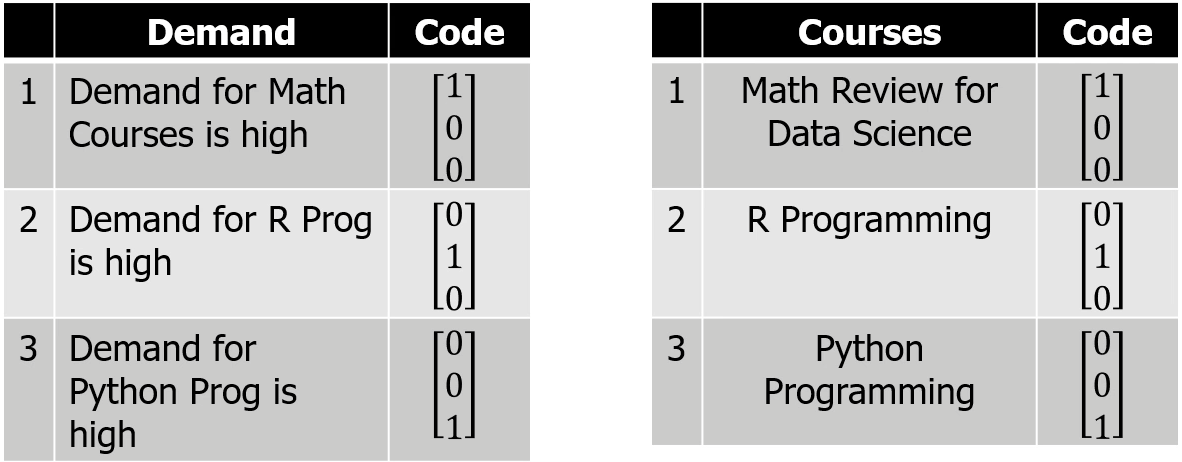

In [5]:
Image("../3. Images/RNNs - 3.png", width=500, height=500)

Let's say, in addition to the demand for courses, which determines which courses will be offered, we also need to ensure that courses are offered in a cycle. That is, if Math has been offered in the Fall quarter, then Math cannot be offered in the Winter quarter.

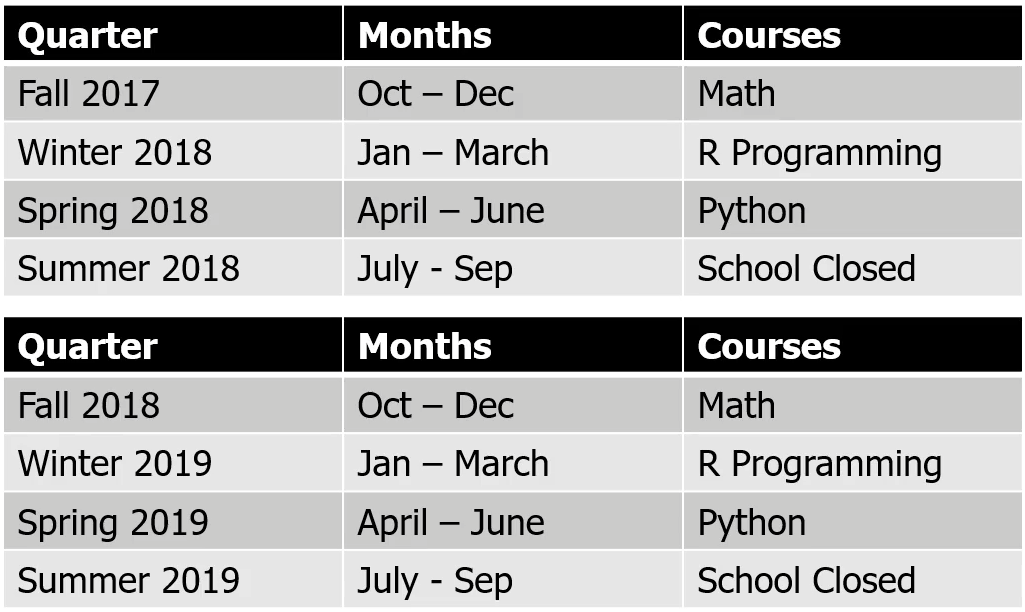

In [6]:
Image("../3. Images/RNNs - 4.png", width=500, height=500)

Whenever we have a cyclical data, where the next element of the data is dependent on the previous element, that is the place where we have to use RNN. This type of data cannot be modeled by a feed forward fully connected neural network.

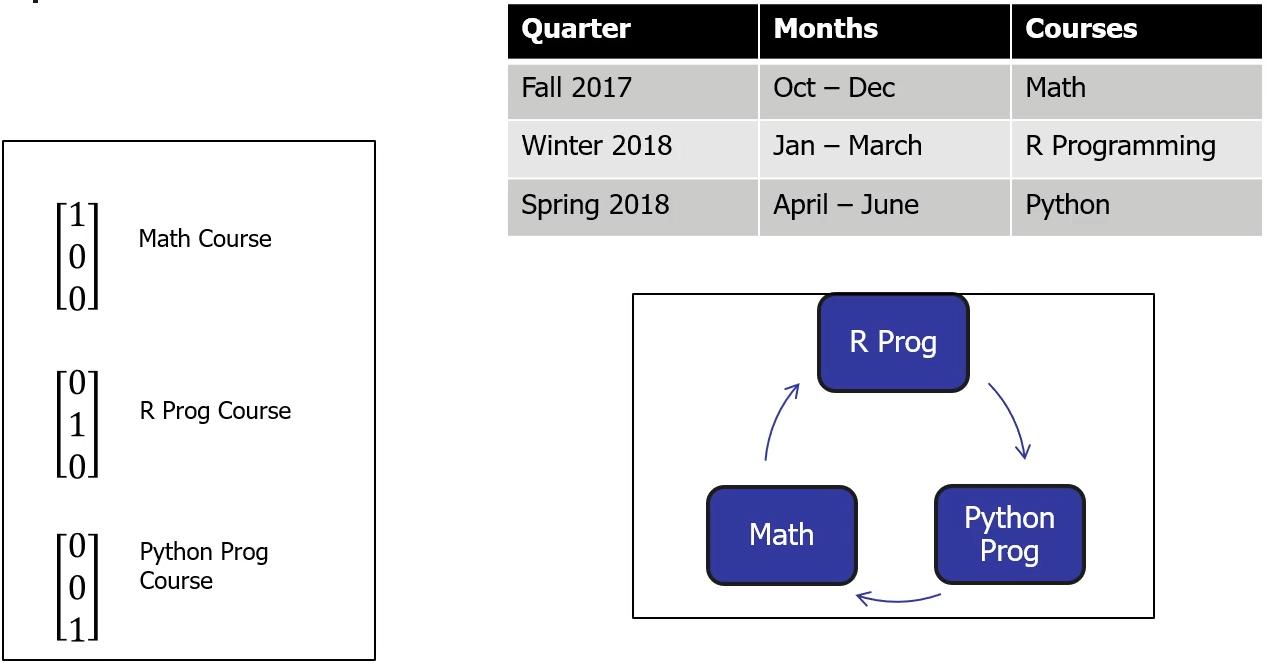

In [7]:
Image("../3. Images/RNNs - 5.png", width=500, height=500)

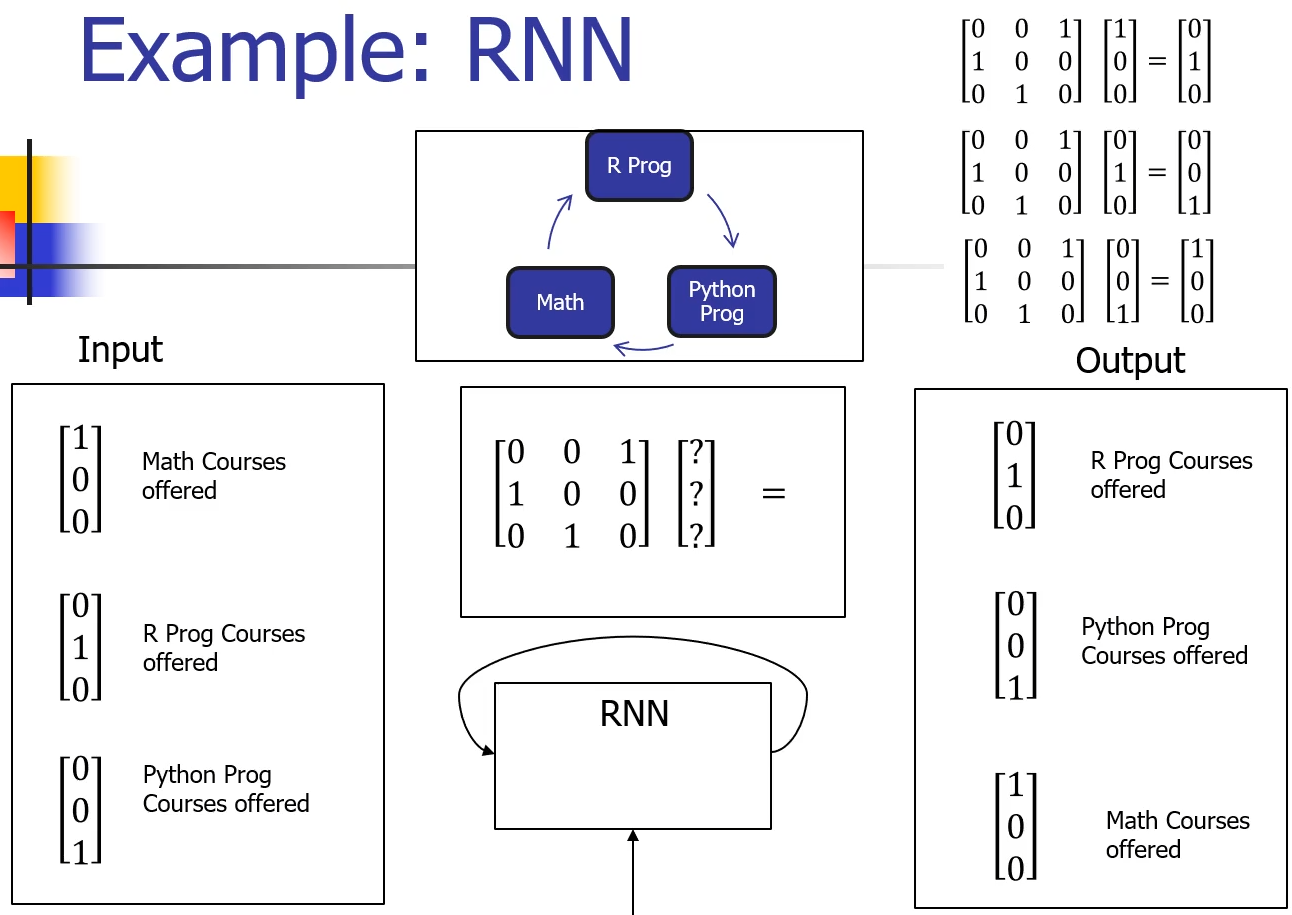

In [8]:
Image("../3. Images/RNNs - 6.png", width=500, height=500)

<h4 style = 'color:green'>1.8.1.3 RNN Math</h4>

RNNs have a recursive function - 

S<sub><i>t</i></sub> = F<sub><i>w</i></sub>(S<sub><i>t-1</i></sub>, X<sub><i>t</i></sub>)

The new state of S<sub><i>t</i></sub> is calculated as follows:

1. Old state at time t-1 is S<sub><i>t-1</i></sub>.
2. Input at time t is X<sub><i>t</i></sub>.
3. F<sub><i>w</i></sub> is a 'tanh()' function.

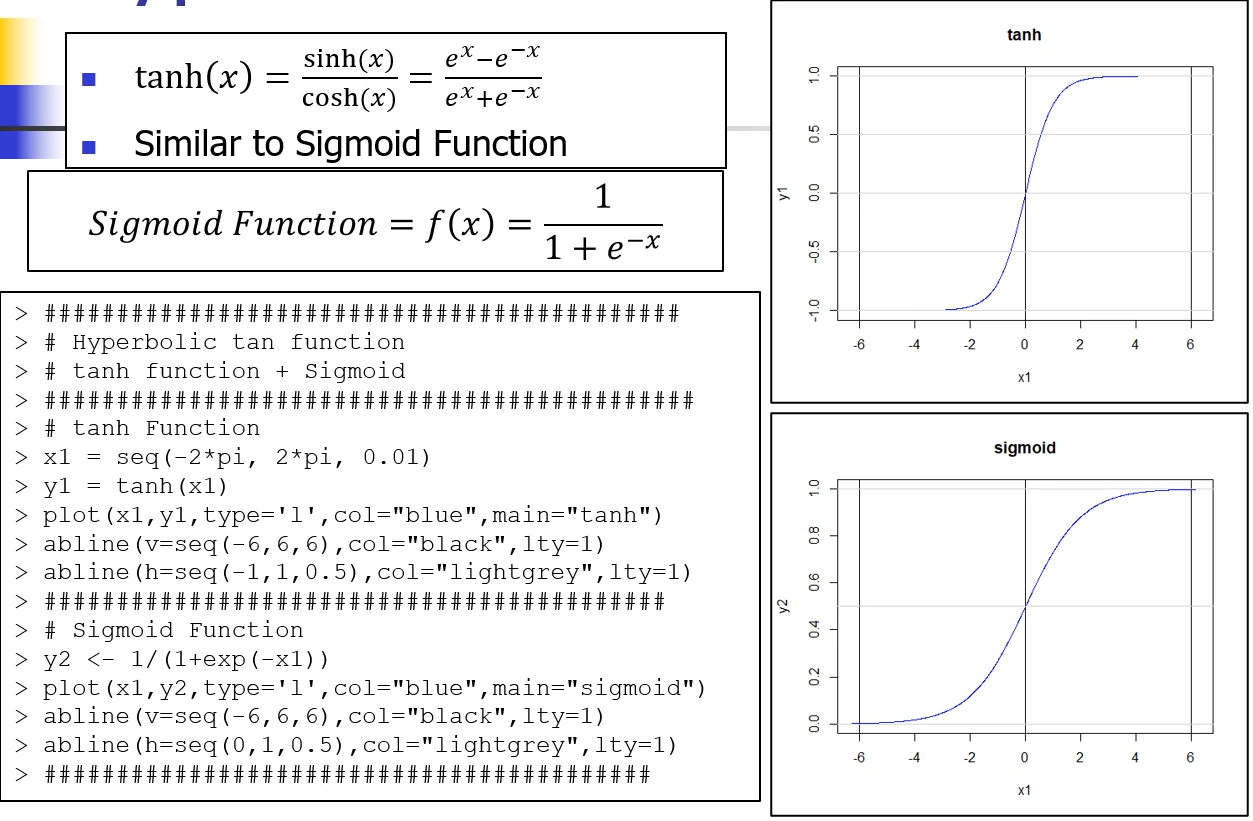

In [9]:
Image("../3. Images/RNNs - 7.png", width=500, height=500)

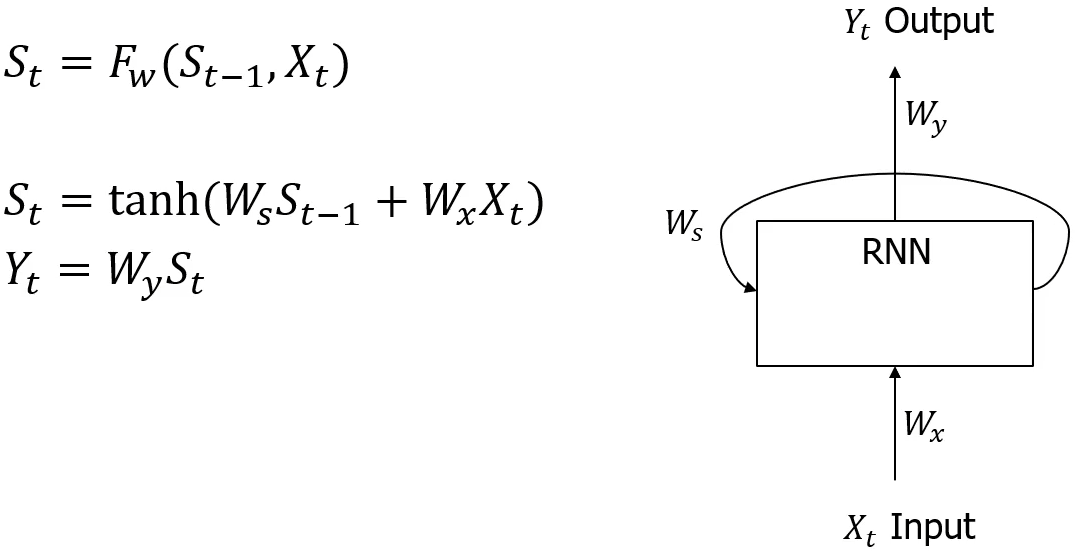

In [10]:
Image("../3. Images/RNNs - 8.png", width=500, height=500)

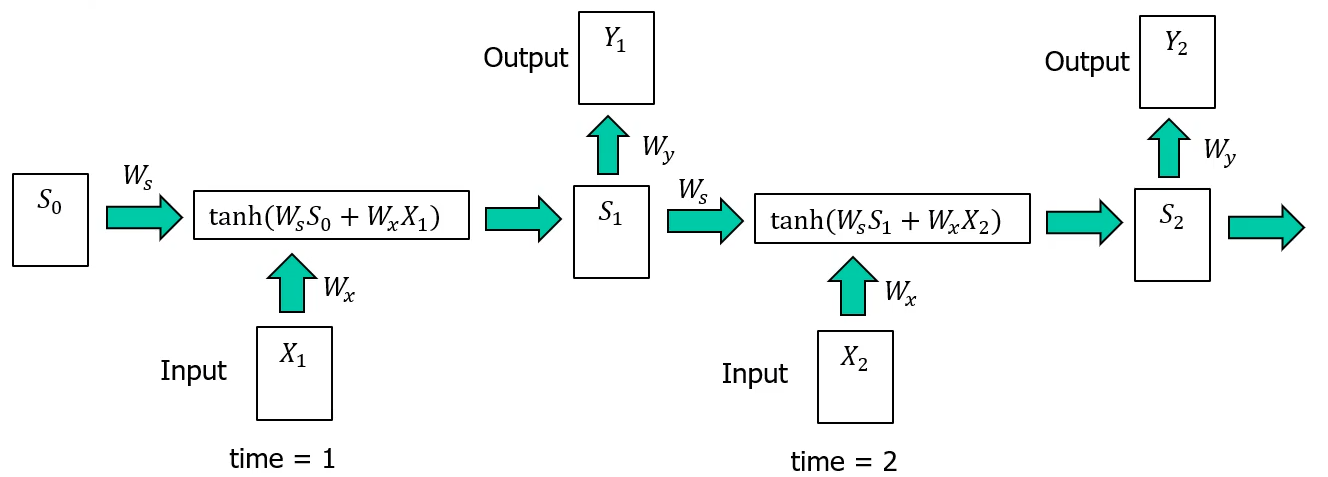

In [11]:
Image("../3. Images/RNNs - 9.png", width=500, height=500)

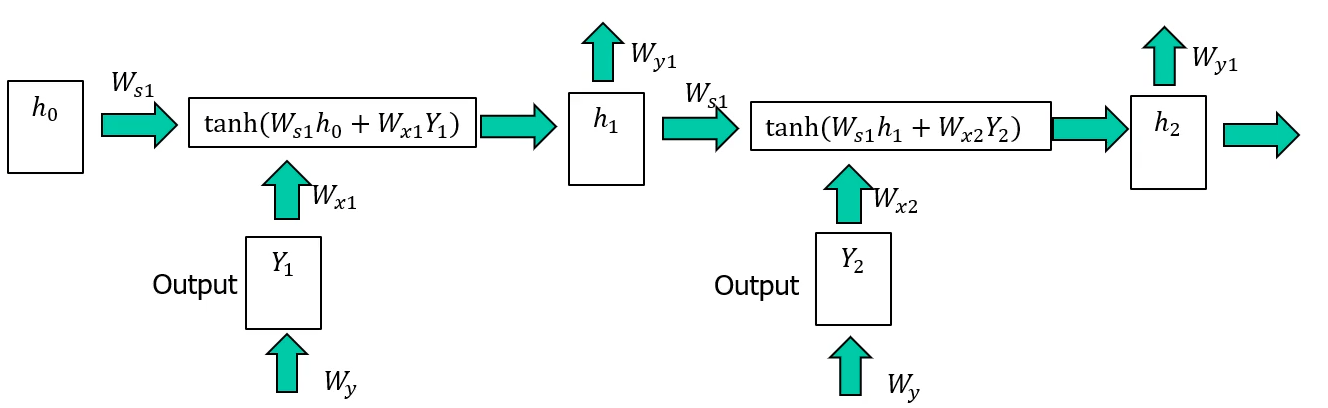

In [12]:
# Adding more layers to the RNN
Image("../3. Images/RNNs - 10.png", width=500, height=500)

<h4 style = 'color:green'>1.8.1.4 Vanishing and Exploding Gradient Problem</h4>

The vanishing gradient problem and the exploding gradient problem are two common issues encountered during the training of deep neural networks, particularly with gradient-based optimization methods like backpropagation. They both involve the gradients of the network's loss function, but they manifest in opposite ways:

### Vanishing Gradient Problem:

- **Description**: In the vanishing gradient problem, the gradients of the loss function approach zero as they are propagated back through the layers. This is particularly problematic with activation functions like the sigmoid or hyperbolic tangent, where the gradients can be very small. As a result, weights in the earlier layers of the network receive very small updates, or none at all, making the training process exceedingly slow or causing it to stall completely.
  
- **Susceptible Architectures**: Traditional RNNs (Recurrent Neural Networks) and deep Feedforward Neural Networks, especially those using non-linear activation functions that saturate, such as sigmoid or tanh, are particularly susceptible to this issue.
  
- **Solutions**:
  - **Use ReLU Activation Function**: The Rectified Linear Unit (ReLU) and its variants (e.g., Leaky ReLU, Parametric ReLU) help mitigate the vanishing gradient problem because they do not saturate in the positive domain.
  - **Weight Initialization Techniques**: Proper initialization methods, like He initialization or Xavier initialization, can help in reducing the risk of vanishing gradients.
  - **Use LSTM or GRU for RNNs**: For recurrent networks, Long Short-Term Memory (LSTM) units or Gated Recurrent Units (GRU) can help alleviate the vanishing gradient problem by incorporating mechanisms that allow for gradients to flow unchanged.
  - **Batch Normalization**: Normalizing the input of each layer can help maintain the gradients in a more stable range.

### Exploding Gradient Problem:

- **Description**: In the exploding gradient problem, the gradients of the loss function become excessively large, leading to large updates to the neural network's weights. This can cause the learning process to diverge, meaning the weights may end up oscillating, diverging, or exploding to very large values, causing the model to fail to converge.
  
- **Susceptible Architectures**: Deep neural networks, especially RNNs, are susceptible to exploding gradients, particularly when dealing with long sequences or when using activation functions that do not saturate.
  
- **Solutions**:
  - **Gradient Clipping**: This technique involves clipping the gradients during backpropagation to ensure they do not exceed a certain threshold, thus preventing them from growing exponentially.
  - **Weight Regularization**: Techniques like L1 or L2 regularization can help prevent the weights from growing too large, which in turn helps mitigate the risk of exploding gradients.
  - **Proper Weight Initialization**: Similar to the vanishing gradient problem, initializing weights properly can help avoid large initial gradients.
  - **Use LSTM or GRU for RNNs**: Just as they help with the vanishing gradient problem, LSTM and GRU architectures can also prevent exploding gradients due to their gating mechanisms.

Both problems can significantly hamper the training of deep neural networks, but with careful network design, choice of activation functions, and training techniques, they can be mitigated. Understanding these issues is crucial for effectively training deep neural networks, particularly as the architecture becomes deeper or more complex.


One of the ways to handle the problem of vanishing and exploding gradients is to use a memory to store the previous state of the network. This way, the network won't have to re-train itself, but instead will store the previous state of the network in memory.

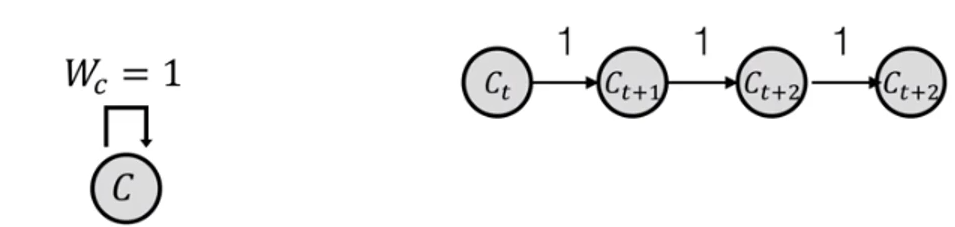

In [14]:
Image("../3. Images/LSTM - 2.png", width=500, height=500)

The <b>Long Short-Term Memory (LSTM)</b> architecture is a recurrent neural network that uses a memory to store the previous state of the network. A traditional calculator has three buttons that allow the user to store, recall, and reset numbers. This method provides the basic idea behind LSTM.

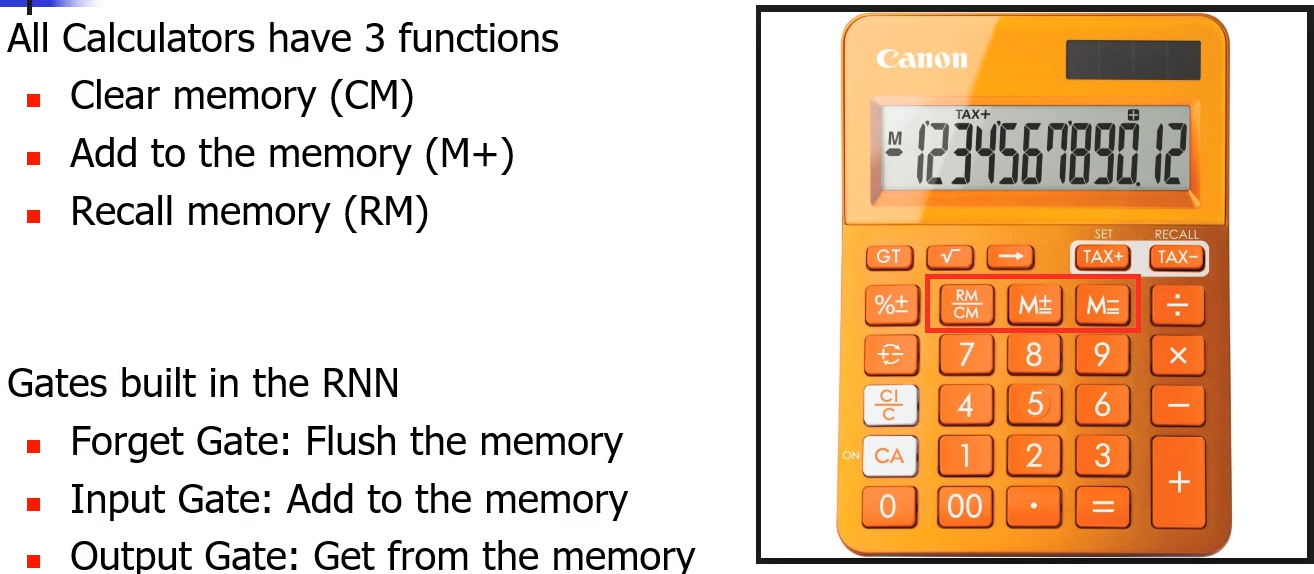

In [13]:
Image("../3. Images/LSTM - 1.png", width=500, height=500)

In the case of an LSTM, we calculate the gradient at the early stages and then create three gates - a) Forget gate, b) Input gate, and c) Output gate. It is called Long Short-Term Memory (LSTM) because it can be used to store bits of information (i.e., gradients) and it can be used anytime (long).

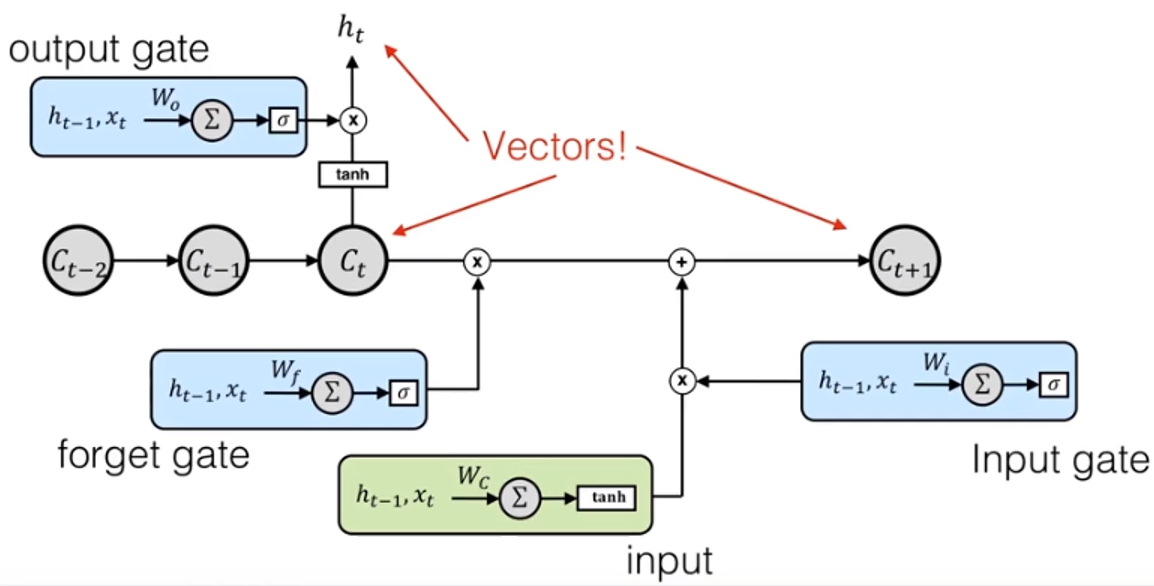

In [15]:
Image("../3. Images/LSTM - 3.png", width=500, height=500)

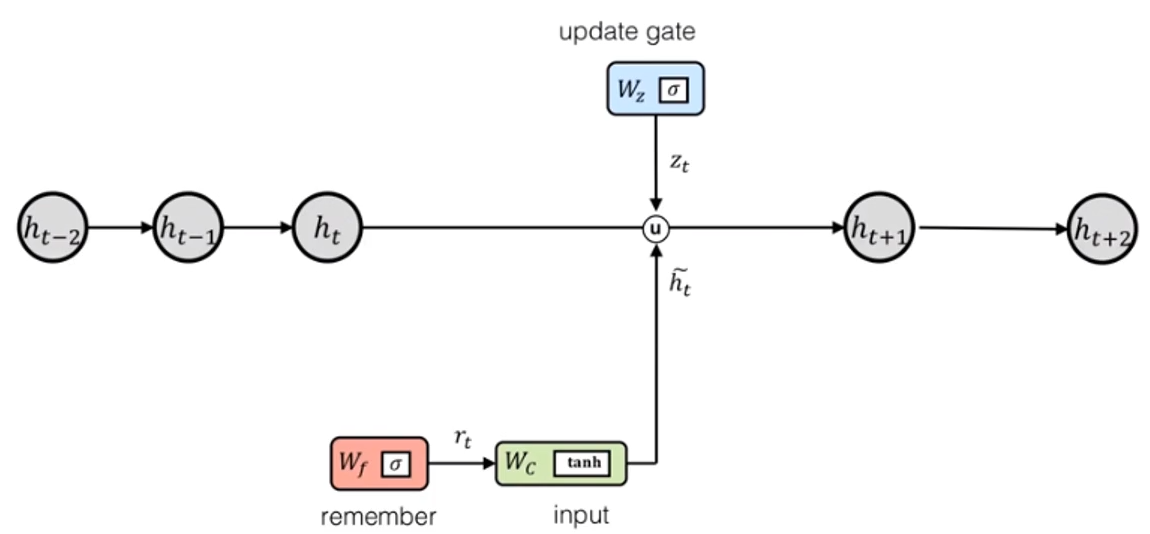

In [18]:
# GRU [Gate Recurrent Unit]

Image("../3. Images/LSTM - 4.png", width=500, height=500)

<h3 style = 'color:lightgreen'>1.8.2 Transformers</h3>